# Collect and Plot data from simulation parametric sweeps

In [10]:
# Collate data from parametric sweeps for combined analysis plots
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from tqdm import tqdm
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})



In [21]:
# Folder containing data
# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_4_activity_time_2000'

# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_2_1/activity_time_750'
# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/2021-02-27'

# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000'
# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/AnalysisData'

# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750'

# data_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/StochasticActivity/NormalDistribution'

# Parameters that are saved in the final dataframe
parameter = 'spring constant'
data_name = 'Unique positions count'

df_param_sweep = {}

# Interpolation for time-series data
n_times = 1000

mu  = 1/6
radius = 1
b0 = 4*radius
L = 32*b0
D0 = 1.5


# Find all simulation data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):
   
    root, subFolderName = os.path.split(dirs)
 
    if('SearchCoverage' in subFolderName):
        
        root, *rest = os.path.split(root)
   
        # Get the metadata for this condition
        df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
           
        print(df_metadata['spring constant'][0])
        activity_time = df_metadata[' activity time scale'][0]
        Np =  df_metadata['N particles'][0]
        b0 =  df_metadata['bond length'][0]
        
        df_param_sweep[df_metadata[parameter][0]] = pd.DataFrame({})
        
        count = 1
        for file in files:
            if('timeseries' in file):
                # Load the time-series data
                df_current = pd.read_csv(os.path.join(dirs,file))
                time = df_current['Time']
                data = df_current[data_name]
                
                data_fun = interpolate.interp1d(time, data, kind = 'linear')
                
                time_vect_sampled = np.linspace(np.min(time), np.max(time), n_times)
                
                data_sampled = data_fun(time_vect_sampled)
                
                df_sampled = pd.DataFrame({'Time':time_vect_sampled, 'Initial condition': np.repeat(count, n_times), data_name: data_sampled})
                df_param_sweep[df_metadata[parameter][0]] = df_param_sweep[df_metadata[parameter][0]].append(df_sampled)
                count +=1 
    
# # for file in tqdm(files_list):
	
# def run_filament_analysis(file):
# 	print('Analyzing file ...')
# 	print(file)

# 	filament = analysis.analysisTools(file = file)
# 	filament.filament_tip_coverage(save = True)


# num_cores = multiprocessing.cpu_count()

# num_cores = 12

# results = Parallel(n_jobs=num_cores,  verbose=10)(delayed(run_filament_analysis)(file) for file in tqdm(files_list))


35.0
17.5
25.0
27.5
20.0
37.5
32.5
15.0
45.0
22.5
40.0
30.0


In [22]:
df_param_sweep

{35.0:               Time  Initial condition  Unique positions count
 0         0.000000                  1                     1.0
 1       374.151153                  1                     8.0
 2       748.302307                  1                    22.0
 3      1122.453460                  1                    28.0
 4      1496.604614                  1                    40.0
 ..             ...                ...                     ...
 995  372280.397662                  1                   964.0
 996  372654.548815                  1                   964.0
 997  373028.699969                  1                   964.0
 998  373402.851122                  1                   964.0
 999  373777.002276                  1                   964.0
 
 [1000 rows x 3 columns],
 17.5:               Time  Initial condition  Unique positions count
 0         0.000000                  1                1.000000
 1       373.756420                  1               24.537538
 2       747.51

In [39]:
# Path for saving data
# save_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis'
save_folder = '/home/deepak/Dropbox/LacryModeling/AnalysisResults/CombinedAnalysis'
len(df_param_sweep)

NameError: name 'df_param_sweep' is not defined

In [33]:
df_param_sweep

{35.0:               Time  Initial condition  Unique positions count
 0         0.000000                  1                     1.0
 1       374.151153                  1                     8.0
 2       748.302307                  1                    22.0
 3      1122.453460                  1                    28.0
 4      1496.604614                  1                    40.0
 ..             ...                ...                     ...
 995  372280.397662                  1                   964.0
 996  372654.548815                  1                   964.0
 997  373028.699969                  1                   964.0
 998  373402.851122                  1                   964.0
 999  373777.002276                  1                   964.0
 
 [1000 rows x 3 columns],
 17.5:               Time  Initial condition  Unique positions count
 0         0.000000                  1                1.000000
 1       373.756420                  1               24.537538
 2       747.51

# Time series of unique locations sampled

## Plot the time-series of unique locations sampled

<IPython.core.display.Javascript object>


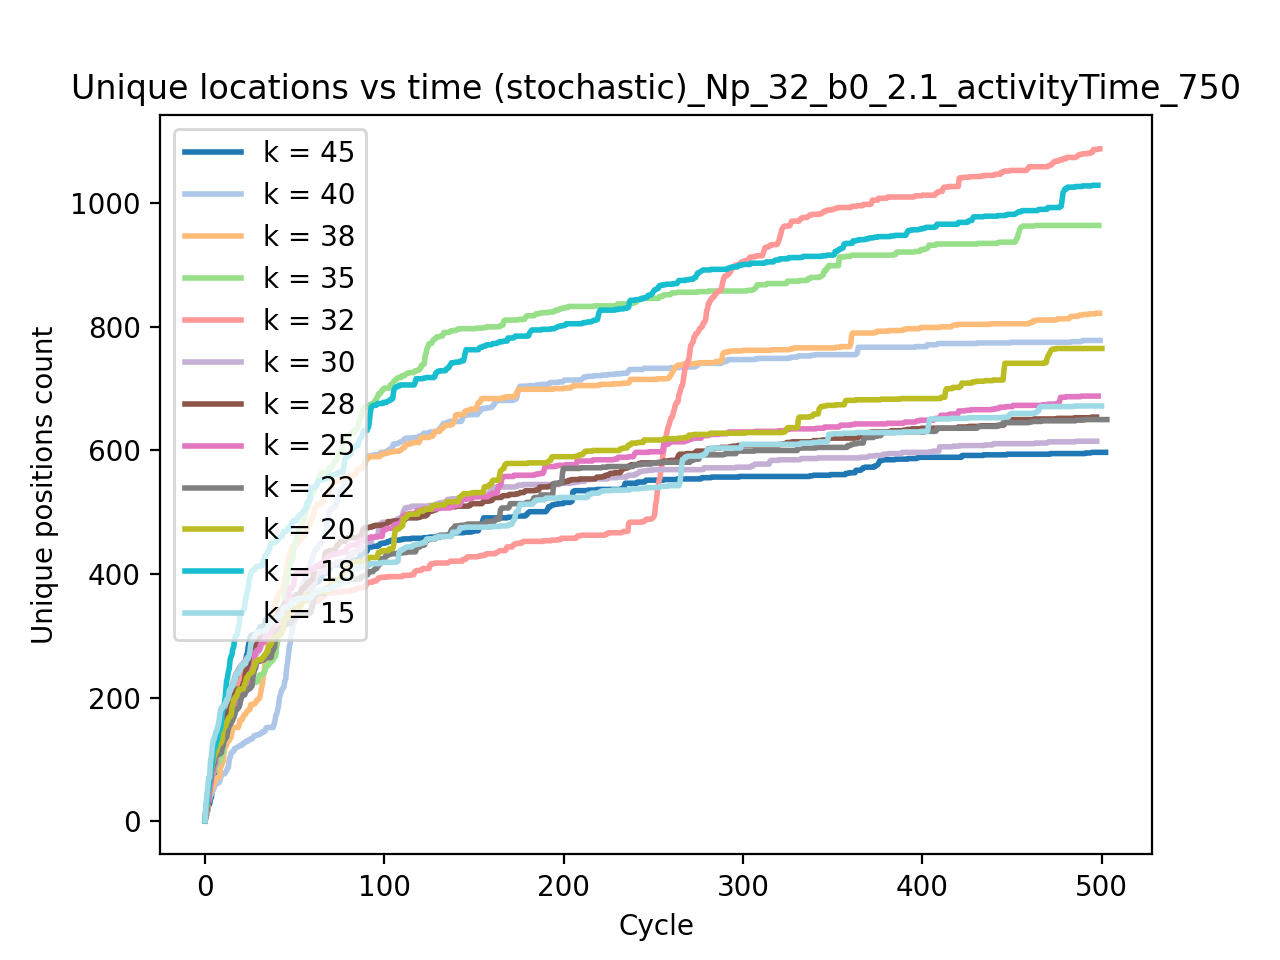

100%|██████████| 12/12 [00:00<00:00, 21.28it/s]


In [35]:
# Plot the timer-series of unique locations sampled

# plt.style.use('dark_background')
plt.style.use('default')

cmap = cm.get_cmap('tab20')
# cmap = sns.color_palette("husl", 255, as_cmap = True)
colors = [cmap(ii) for ii in np.linspace(0,1, len(df_param_sweep))]

title = 'Unique locations vs time (stochastic)' + '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
count = 0
for key in tqdm(sorted(df_param_sweep.keys(), reverse = True)):
    kappa = 0.25*key
    activity_number = (mu*radius**3*L**2*D0/kappa)
#     sns.lineplot(data = df_param_sweep[key], x = df_param_sweep[key]['Time']/activity_time, y = 'Unique positions count', color = colors[count], linewidth= 2, label = 'A = {}'.format(round(activity_number)))
    sns.lineplot(data = df_param_sweep[key], x = df_param_sweep[key]['Time']/activity_time, y = 'Unique positions count', color = colors[count], linewidth= 2, label = 'k = {}'.format(round(key)))

    count+=1

plt.title(title)
plt.xlabel('Cycle')
# plt.legend(loc=(1.04,0), borderaxespad = 0)
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

# plt.xscale('log')
# plt.yscale('log')
# plt.savefig(os.path.join(save_folder, title +'loglog' + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + 'loglog' + '.svg'), dpi = 300)

    
    

# Max unique locations sampled

In [28]:
# Plot of max unique locations sampled vs filament stiffness
df_unique_locs = pd.DataFrame({})
for key in tqdm(sorted(df_param_sweep.keys())):
    
    n_init_cond = max(df_param_sweep[key]['Initial condition'])
    
    for ii in range(n_init_cond):
        
        max_data = np.max(df_param_sweep[key].loc[df_param_sweep[key]['Initial condition']==ii+1, data_name])
        kappa = 0.25*key
        activity_number = (mu*radius**3*L**2*D0/kappa)

        df_unique_locs = df_unique_locs.append(pd.DataFrame({parameter:[key], 'activity number': activity_number, 'Initial condition':[ii+1], data_name: [max_data], 'activity time':activity_time}))
    

df_unique_locs.to_csv(os.path.join(save_folder,'Max unique locations'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time)+'.csv'))

100%|██████████| 12/12 [00:00<00:00, 474.56it/s]


In [31]:
df_unique_locs

spring constant  activity number  Initial condition  \
0             15.0      1092.266667                  1   
0             17.5       936.228571                  1   
0             20.0       819.200000                  1   
0             22.5       728.177778                  1   
0             25.0       655.360000                  1   
0             27.5       595.781818                  1   
0             30.0       546.133333                  1   
0             32.5       504.123077                  1   
0             35.0       468.114286                  1   
0             37.5       436.906667                  1   
0             40.0       409.600000                  1   
0             45.0       364.088889                  1   

   Unique positions count  activity time  
0                   672.0            750  
0                  1029.0            750  
0                   765.0            750  
0                   650.0            750  
0                   688.0            750  
0                   654.0            750  
0                   615.0            750  
0                  1088.0            750  
0                   964.0            750  
0                   822.0            750  
0                   778.0            750  
0                   597.0            750

<IPython.core.display.Javascript object>


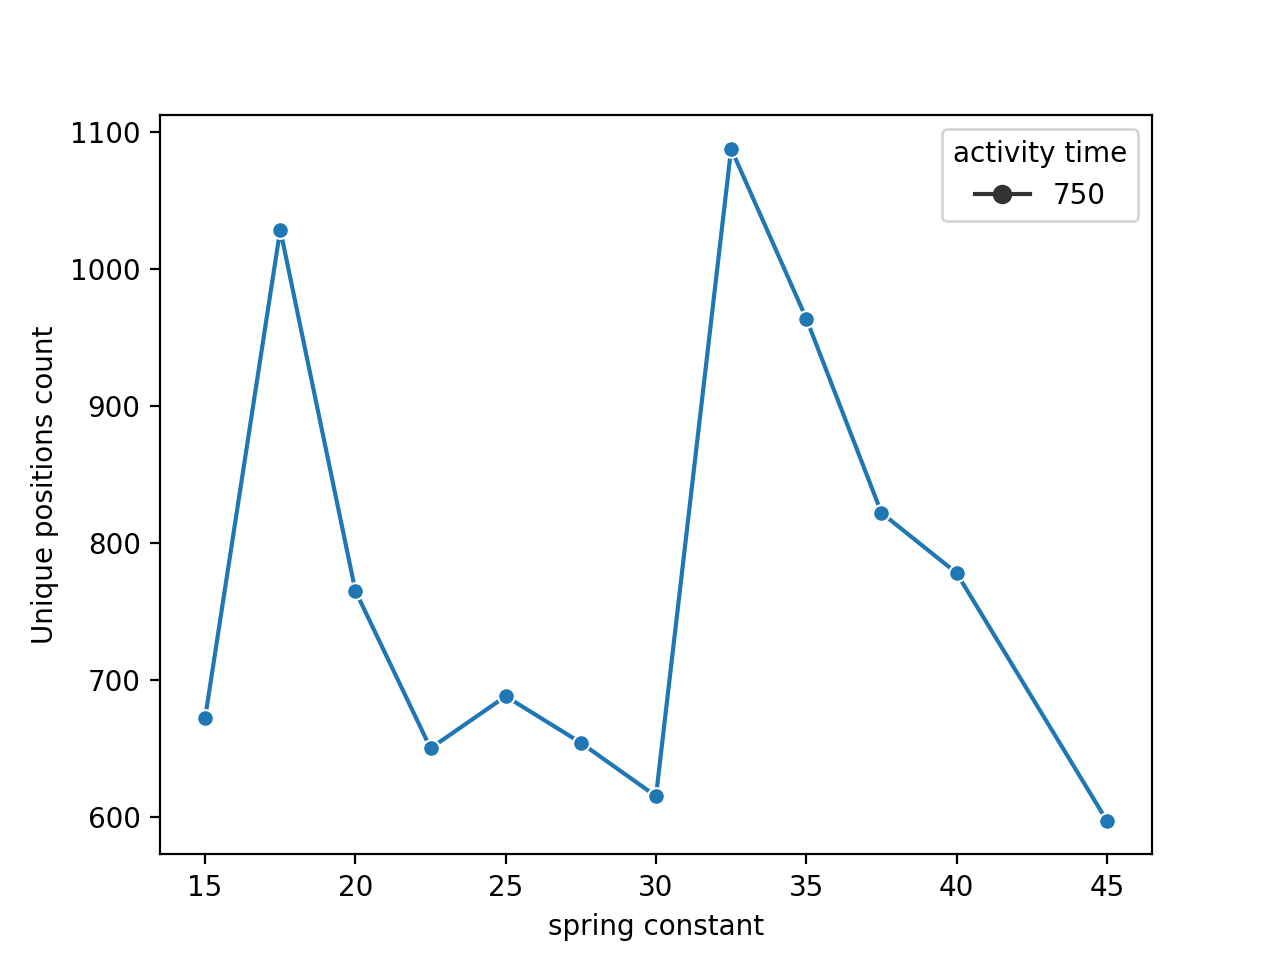

In [32]:
# plt.style.use('dark_background')
plt.style.use('default')


title = 'Max unique locations vs activity number'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
ax = sns.lineplot(data=df_unique_locs, x= 'spring constant', y= data_name, style='activity time', err_style="bars", ci="sd", markers=True)

# ax.set_xscale('log')
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()


In [117]:
# Plot unique locations vs stiffness for all activity time
folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis/MaxUniqueLocations_combined_data'

files = os.listdir(folder)

df_combined = pd.DataFrame({})

for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    df_combined = df_combined.append(df)

<IPython.core.display.Javascript object>


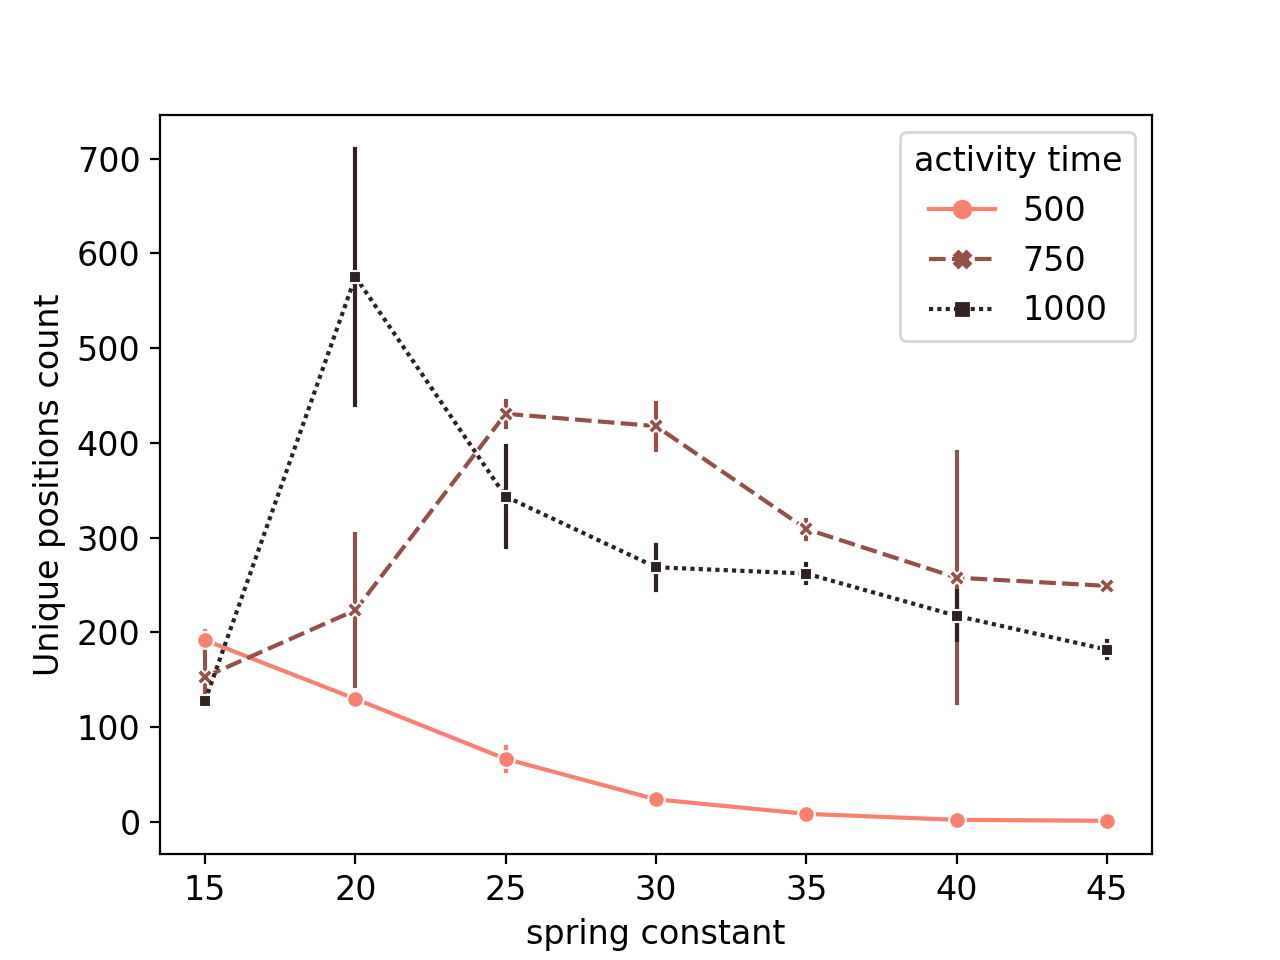

In [125]:
# Plot the unique locations vs stiffness for all activity time
title = 'Max unique locations vs filament stiffness_combined'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)
plt.figure()
sns.lineplot(data=df_combined, x= parameter, y= data_name, style='activity time', hue = 'activity time', err_style="bars", ci="sd", markers=True, palette = "dark:salmon_r")
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

# Plot search metrics and other dynamical measures as a function of one or more filament parameters

In [33]:
# Load all the analysis data and collate into a single data frame
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-06-24'
# data_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness'

# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final', '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness' ]

# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-18']
# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-15', '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-16']

# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750', '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness' ]
data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep', '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-28']


# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames):
                files_list.append(os.path.join(dirs,fileNames))

print(files_list)
print('No:of files: {}'.format(len(files_list)))

['/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_01_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_00_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_02_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point/Analysis/SimResults_01_analysis.csv', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0

In [34]:
# Collect all data into a single data frame
df = pd.DataFrame({})

for file in files_list:
    
    df = df.append(pd.read_csv(file))
    

    
df['periodic dynamics'][df['periodic dynamics']==1.0] = True
df['periodic dynamics'][df['periodic dynamics']==0.0] = False
df['period'][pd.isna(df['period'])] = 'aperiodic'
df['period'][df['simulation completed']== False] = 'Escape'
df

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

Unnamed: 0  N particles  radius  bond length  spring constant  kappa_hat  \
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
..         ...          ...     ...          ...              ...        ...   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   
0            0           32       1          2.1               25       6.25   

    force strength  stresslet strength  potDipole strength simulation type  \
0                0                   0            1.525641           point   
0                0                   0            1.525641           point   
0                0                   0            1.525641           point   
0                0                   0            1.910256           point   
0                0                   0            1.910256           point   
..             ...                 ...                 ...             ...   
0                0                   0            3.320513           point   
0                0                   0            3.320513           point   
0                0                   0            4.666667           point   
0                0                   0            4.666667           point   
0                0                   0            4.666667           point   

   boundary condition 0 boundary condition 1   activity time scale  viscosity  \
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
..                  ...                  ...                   ...        ...   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   
0               clamped                 free                   750   0.166667   

    simulation completed periodic dynamics     period  max unique locations  
0                   True             False  aperiodic                 429.0  
0                   True             False  aperiodic                 448.0  
0                   True             False  aperiodic                 442.0  
0                   True              True          2                 447.0  
0                   True              True          2                 350.0  
..                   ...               ...        ...                   ...  
0                   True             False  aperiodic                 769.0  
0                  False               NaN     Escape                 120.0  
0                  False               NaN     Escape                 803.0  
0                   True             False  aperiodic                 799.0  
0                   True             False  aperiodic                 722.0  

[300 rows x 18 columns]

<IPython.core.display.Javascript object>


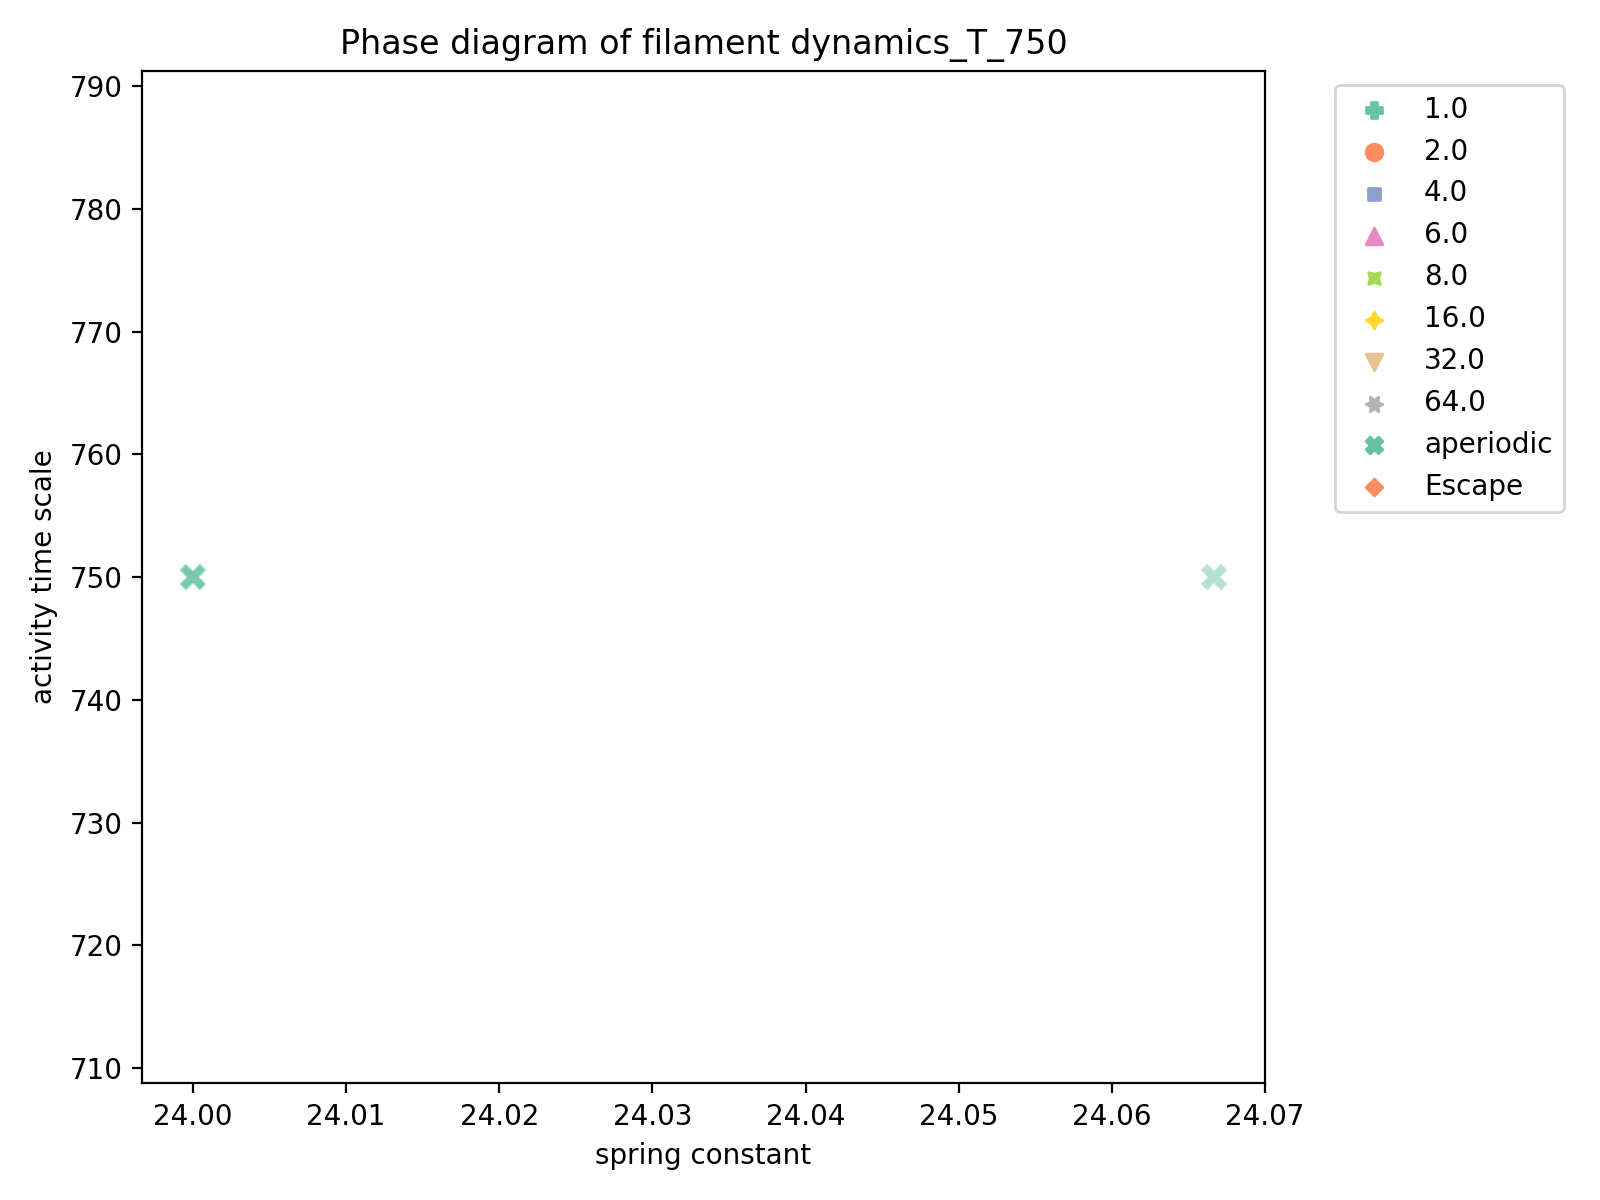

In [67]:
# Plot the max unique locations sampled vs filament stiffness and Activity Time-scale
save_folder = '/home/deepak/Dropbox/LacryModeling/AnalysisResults/CombinedAnalysis'

# Specify Markers used 
# markers = {1.0: "o", 2.0: "X", 3.0: "+",4.0: "d", 6.0: "p", 8.0: "v", 16.0:"d",'aperiodic':"*",'Escape':'<'}
# colors = {"1.0": "o", "2.0": "x", "3.0": "+","4.0": "d", "6.0": "p", "8.0": "p", "16.0":"^","aperiodic":"*",'Escape':'.'}

title = 'Phase diagram of filament dynamics'
fig, ax = plt.subplots(figsize=(8,6))
# sns.scatterplot(x="spring constant", y=" activity time scale", hue="max unique locations", size="max unique locations",
#             sizes=(40, 400), alpha=1, palette="flare", data=df, style = "period", ax = ax,style_order = [1.0, 2.0, 4.0, 6.0, 16.0, 'aperiodic'])
sns.scatterplot(x="spring constant", y="activity time scale", hue="period",
            sizes=(400, 400), alpha=0.5, palette="Set2", data=df, style = "period", ax = ax,hue_order = [1.0, 2.0, 4.0, 6.0, 8.0, 16.0, 32.0, 64.0, 'aperiodic', 'Escape'], s= 100)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title(title)
plt.tight_layout() 
# plt.savefig(os.path.join(save_folder, title+'.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title+'.svg'), dpi = 300)

<IPython.core.display.Javascript object>


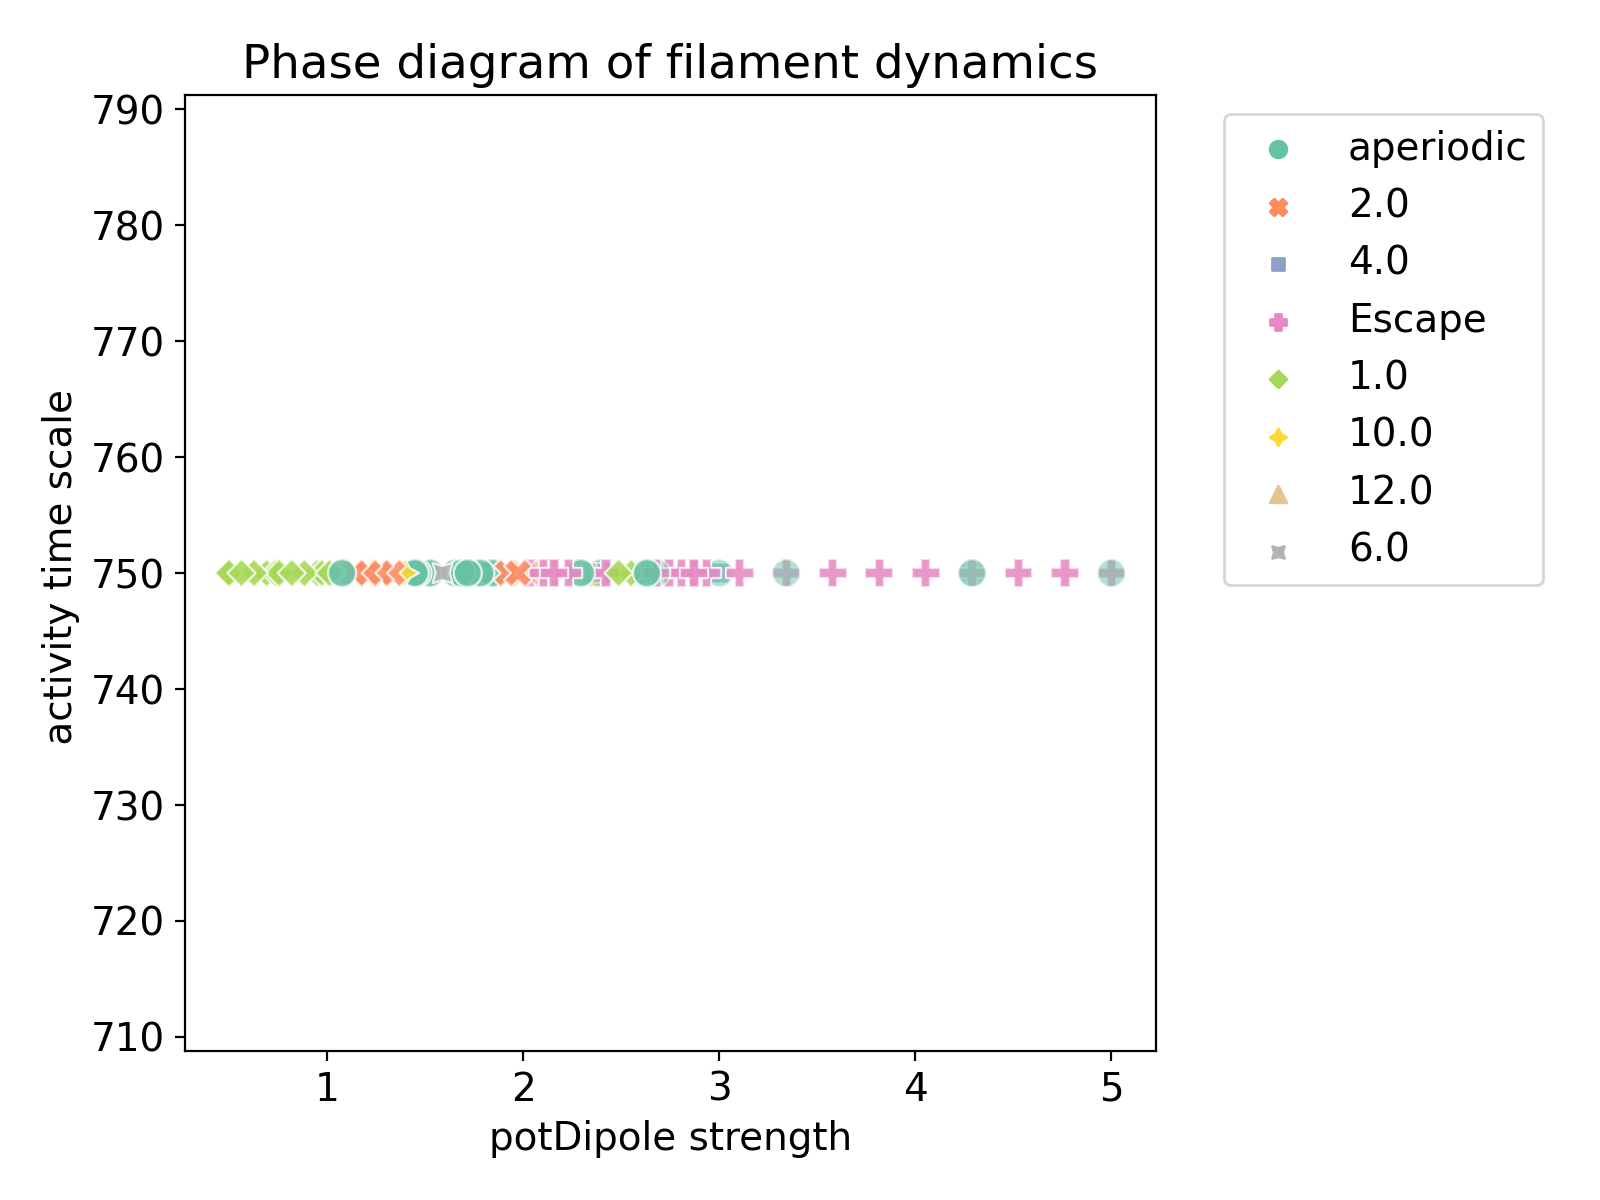

In [17]:
title = 'Phase diagram of filament dynamics'
fig, ax = plt.subplots(figsize=(8,6))
# sns.scatterplot(x="spring constant", y=" activity time scale", hue="max unique locations", size="max unique locations",
#             sizes=(40, 400), alpha=1, palette="flare", data=df, style = "period", ax = ax,style_order = [1.0, 2.0, 4.0, 6.0, 16.0, 'aperiodic'])
sns.scatterplot(x="potDipole strength", y=" activity time scale", hue="period",
            sizes=(400, 400), alpha=0.5, palette="Set2", data=df, style = "period", ax = ax, s= 100)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title(title)
plt.tight_layout() 

<IPython.core.display.Javascript object>


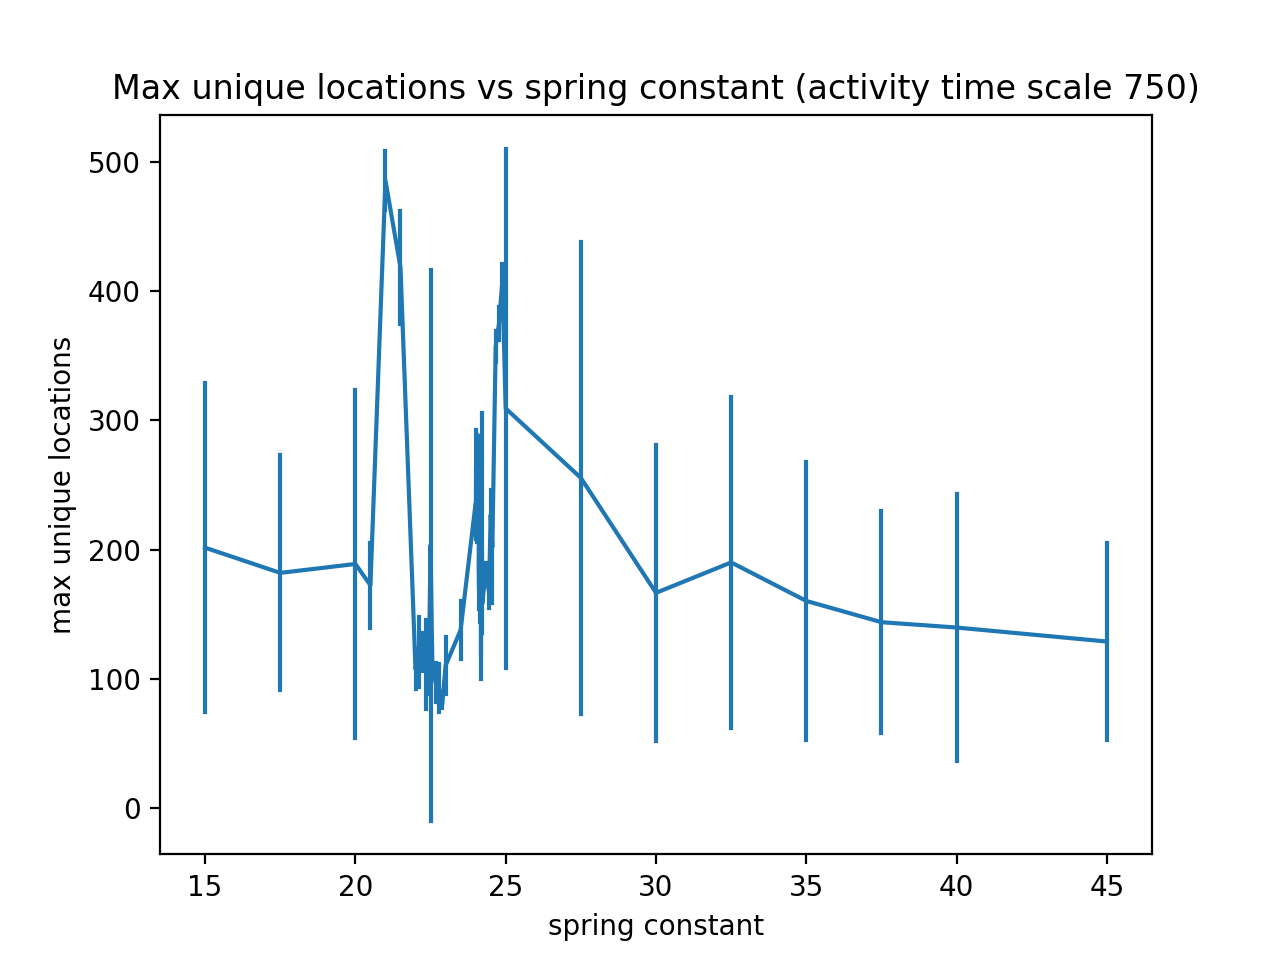

In [66]:
plt.style.use('default')
activity_time_scale = df[' activity time scale'][:][0]
title = 'Max unique locations vs spring constant (activity time scale {})'.format(750)
plt.figure()
ax = sns.lineplot(data=df, x= 'spring constant', y= 'max unique locations', err_style="bars", ci="sd", markers=True)

# ax.set_xscale('log')
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.title(title)
plt.show()

<IPython.core.display.Javascript object>


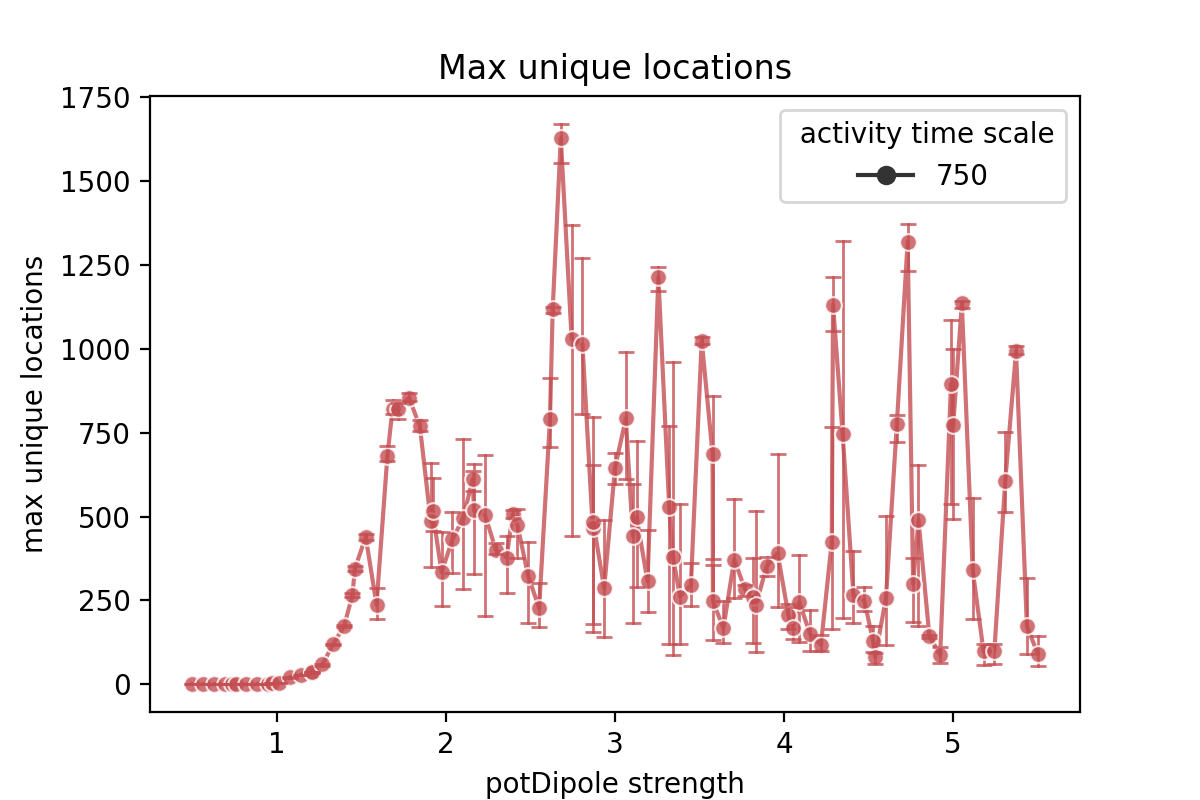

In [83]:
# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures'


# Set the values for the publication figure parameters
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})
sns.set(font_scale = 1)


# Plot Max unique locations sampled vs Activity strength

plt.style.use('default')
activity_time_scale = df[' activity time scale'][:][0]
title = 'Max unique locations'
plt.figure(figsize=(6, 4))
# ax = sns.lineplot(data=df, x= 'potDipole strength', y= 'max unique locations', ci=None, markers=False, dashes = False, color = 'k')

ax1 = sns.lineplot(data=df, x= 'potDipole strength', y= 'max unique locations', style=" activity time scale", markers='o', ci=95, err_style = 'bars', err_kws= {'capsize':3, 'elinewidth':1, 'ecolor':'r'}, markerfacecolor='r', markeredgecolor='w', color = 'r', alpha =0.8)



# ax.set_xscale('log')
plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
plt.title(title)
plt.show()

In [58]:
print(x_label_values)

[0.5        0.56410256 0.62820513 0.69230769 0.73684211 0.75641026
 0.82051282 0.88461538 0.94871795 0.97368421 1.01282051 1.07692308
 1.14102564 1.20512821 1.21052632 1.26923077 1.33333333 1.3974359
 1.44736842 1.46153846 1.52564103 1.58974359 1.65384615 1.68421053
 1.71794872 1.78205128 1.84615385 1.91025641 1.92105263 1.97435897
 2.03846154 2.1025641  2.15789474 2.16666667 2.23076923 2.29487179
 2.35897436 2.39473684 2.42307692 2.48717949 2.55128205 2.61538462
 2.63157895 2.67948718 2.74358974 2.80769231 2.86842105 2.87179487
 2.93589744 3.         3.06410256 3.10526316 3.12820513 3.19230769
 3.25641026 3.32051282 3.34210526 3.38461538 3.44871795 3.51282051
 3.57692308 3.57894737 3.64102564 3.70512821 3.76923077 3.81578947
 3.83333333 3.8974359  3.96153846 4.02564103 4.05263158 4.08974359
 4.15384615 4.21794872 4.28205128 4.28947368 4.34615385 4.41025641
 4.47435897 4.52631579 4.53846154 4.6025641  4.66666667 4.73076923
 4.76315789 4.79487179 4.85897436 4.92307692 4.98717949 5.
 5.0

# Plot tip locations visted by filament (at constant phase) vs different simulation parameters

In [3]:
# Activity strength
data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep', '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-28']


# Spring constant
# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750', '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness' ]

# data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-15', '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-16']
# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('hdf5') and fileNames[0] != '.' and 'analysis' in fileNames):
                files_list.append(os.path.join(dirs,fileNames))

print(files_list)
print('No:of files: {}'.format(len(files_list)))

['/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_02_analysis.hdf5', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_00_analysis.hdf5', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point/Analysis/SimResults_01_analysis.hdf5', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point/Analysis/SimResults_02_analysis.hdf5', '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0

In [4]:
# Build a data frame with all the data and the parameter of interest
# Collect all data into a single data frame
df = pd.DataFrame({})
# parameter = 'spring constant'
parameter = 'potDipole strength'

for file in files_list:
    
    with h5py.File(file, "r") as f:
        if('analysis data' in f.keys()): # Load the simulation data (newer method)
                    
            dset = f['analysis data']
            
            if(dset.attrs['Sim complete']==True):
                parameter_value = dset.attrs[parameter]
                

                tip_angles = dset['Tip angles'][:]

                df_file = pd.DataFrame({parameter:np.repeat(parameter_value, len(tip_angles),axis=0), 'Tip angles':tip_angles})
                
                print(len(df_file))
                df = df.append(df_file, ignore_index=True)

251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251
251


In [48]:
# # pd.set_option('display.max_rows', None)
# df

<IPython.core.display.Javascript object>


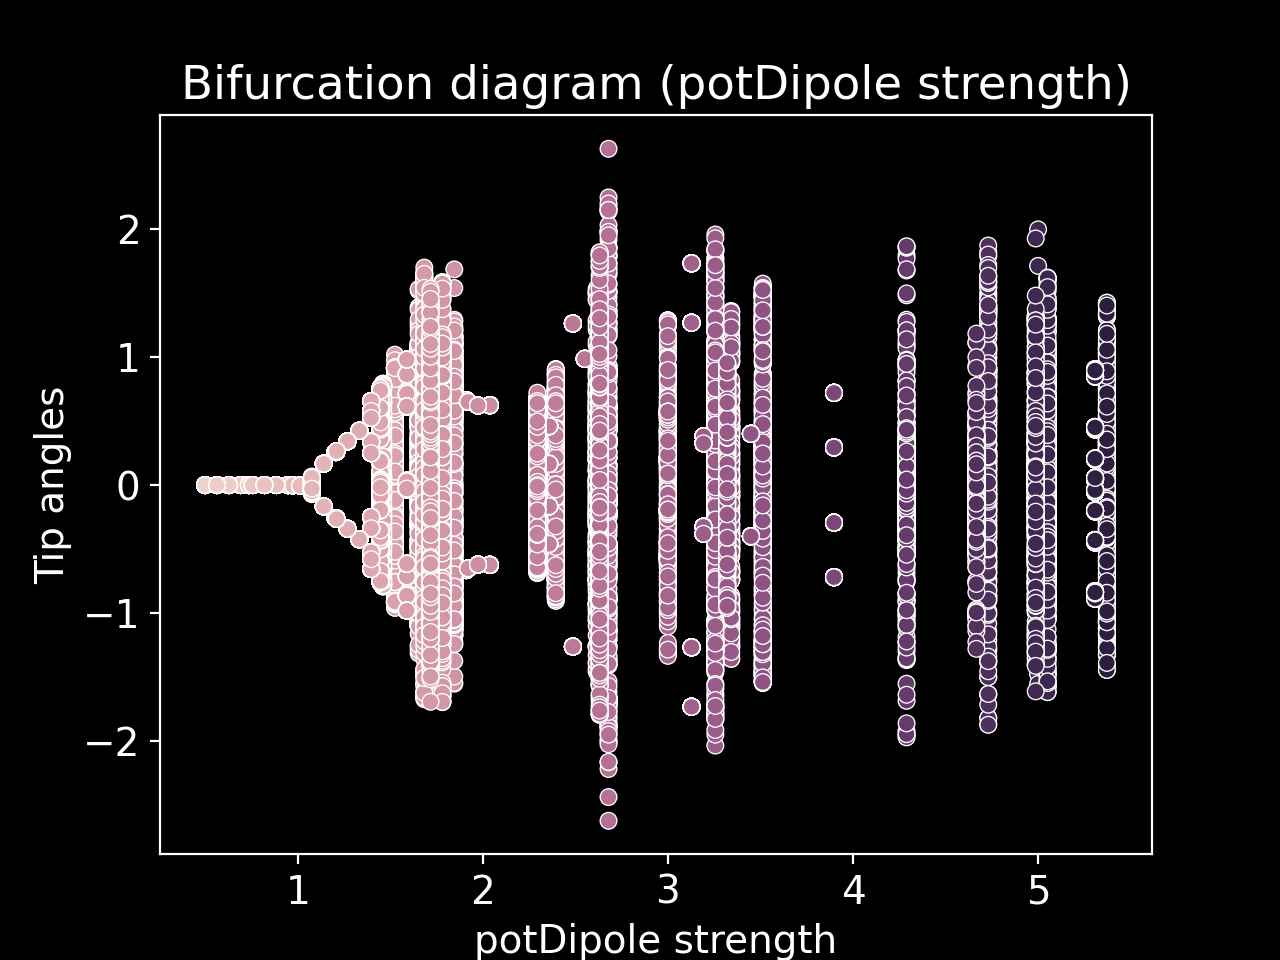

In [10]:
# Plot the locations visited by the filament vs different parameters
plt.style.use('dark_background')
title = 'Bifurcation diagram ({})'.format(parameter)
plt.figure()
sns.scatterplot(x = parameter, y = 'Tip angles', hue = parameter, data = df, estimator = None, legend= False)
plt.title(title)
# plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
# plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


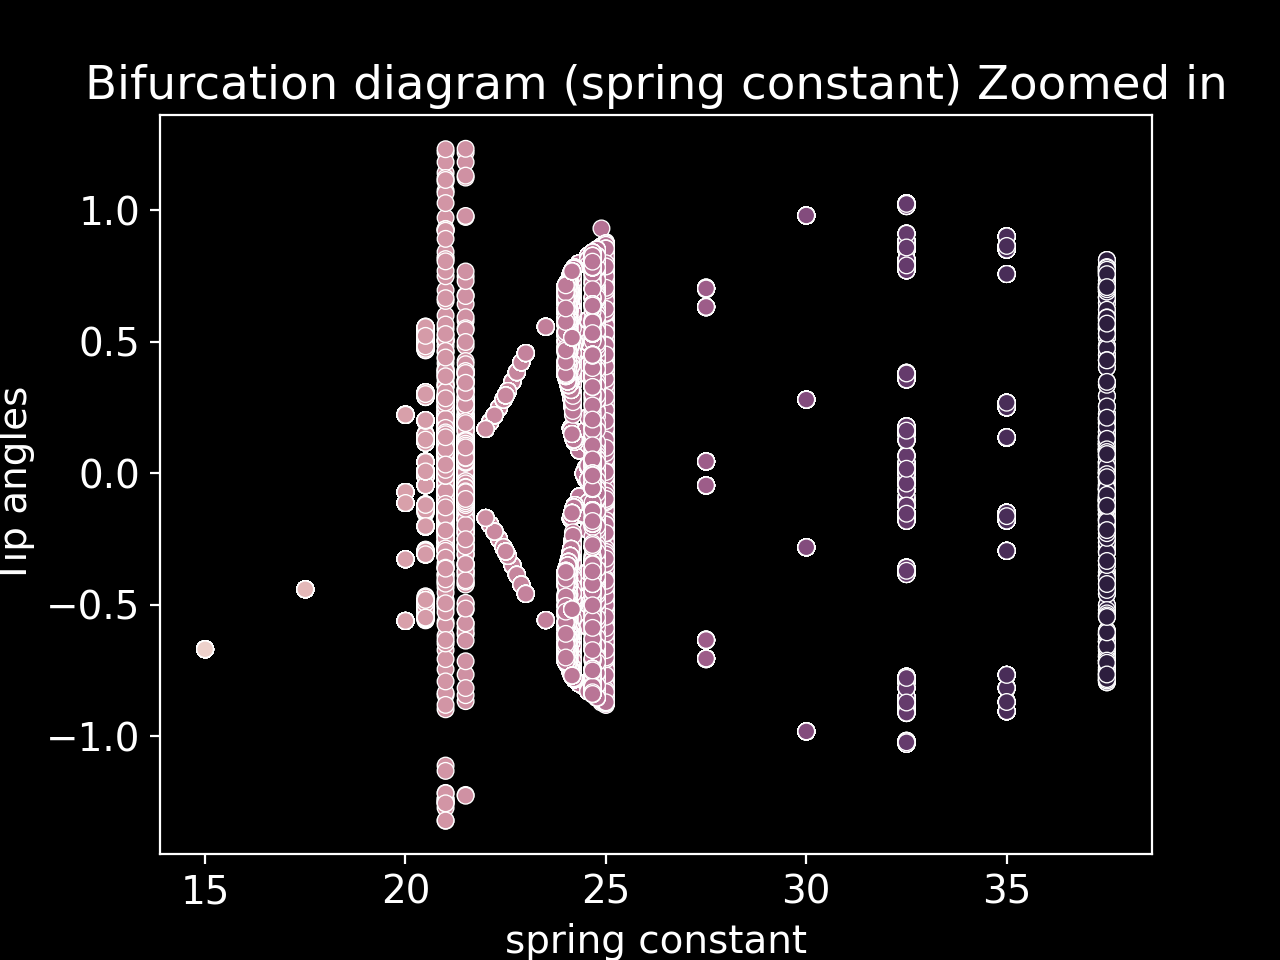

In [47]:
plt.style.use('dark_background')
title = 'Bifurcation diagram ({}) Zoomed in'.format(parameter)
plt.figure()
sns.scatterplot(x = parameter, y = 'Tip angles', hue = parameter, data = df[df[parameter]<40], estimator = None, legend= False)
plt.title(title)
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


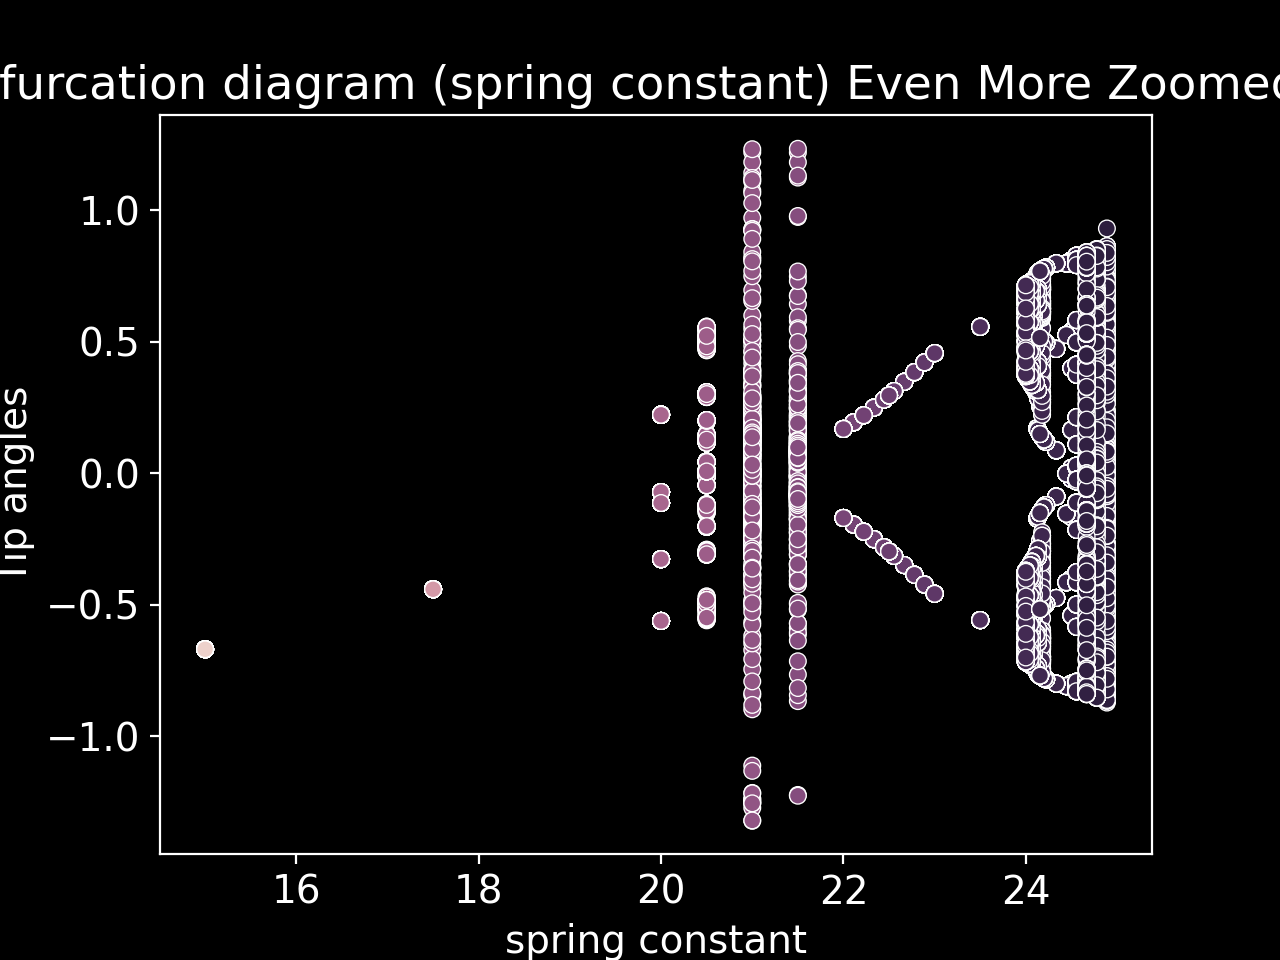

In [52]:
plt.style.use('dark_background')
title = 'Bifurcation diagram ({}) Even More Zoomed in'.format(parameter)
plt.figure()
sns.scatterplot(x = parameter, y = 'Tip angles', hue = parameter, data = df[df[parameter]<25], estimator = None, legend= False)
plt.title(title)
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


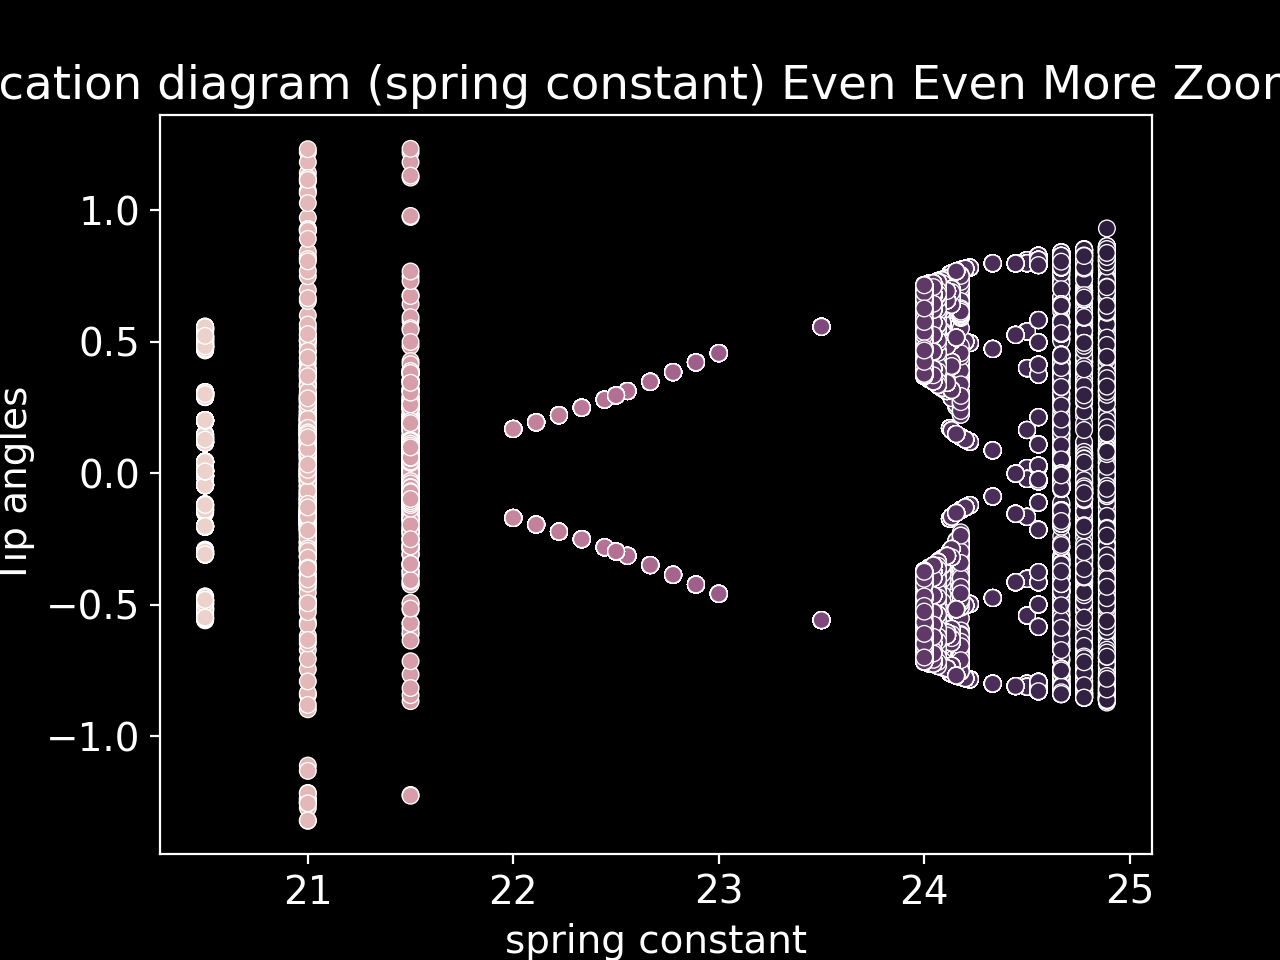

In [54]:
plt.style.use('dark_background')
title = 'Bifurcation diagram ({}) Even Even More Zoomed in'.format(parameter)
plt.figure()
sns.scatterplot(x = parameter, y = 'Tip angles', hue = parameter, data = df[(df[parameter]>20) & (df[parameter]<25)], estimator = None, legend= False)
plt.title(title)
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

<IPython.core.display.Javascript object>


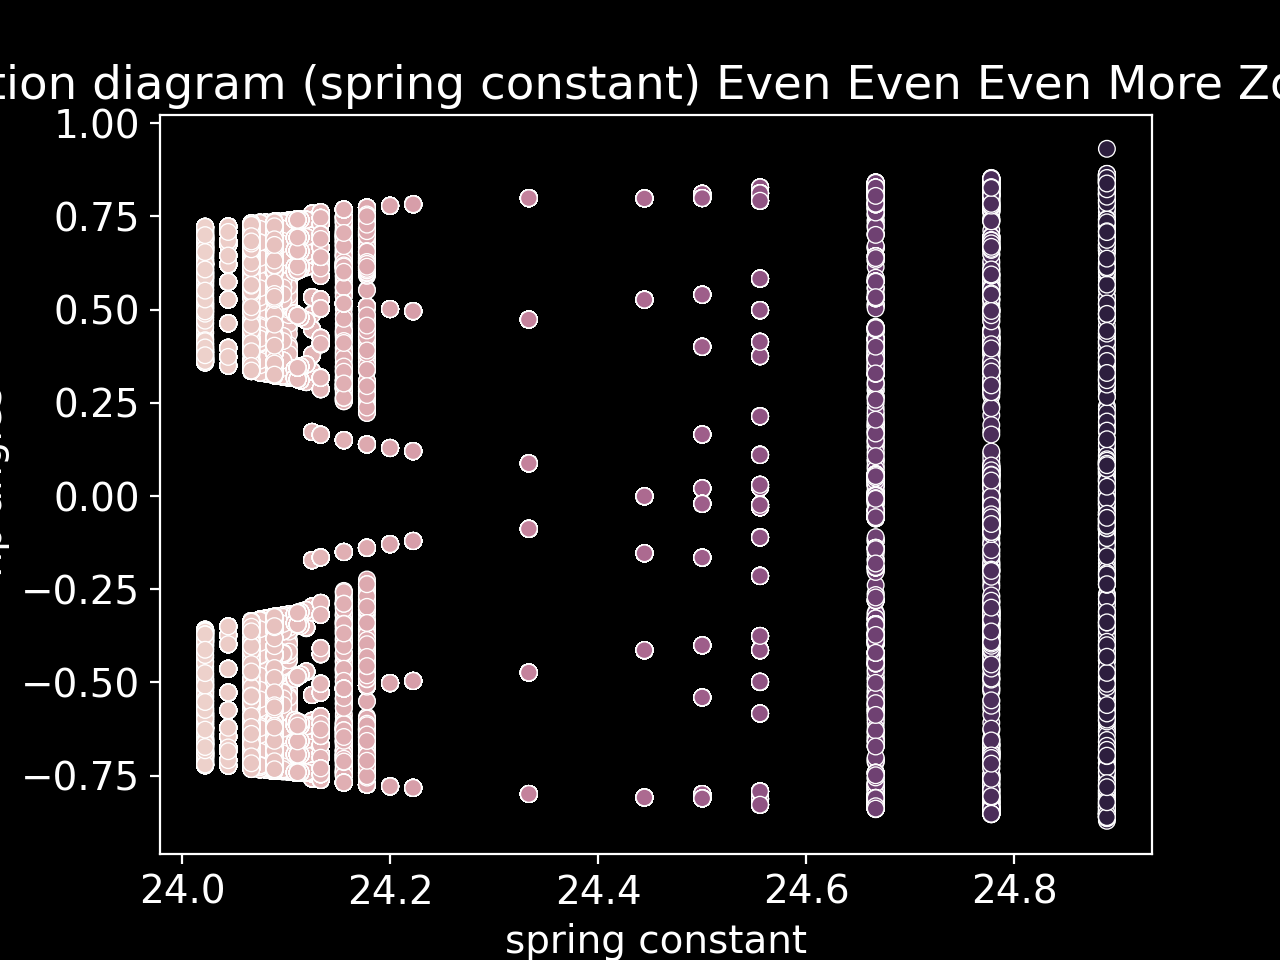

In [55]:
plt.style.use('dark_background')
title = 'Bifurcation diagram ({}) Even Even Even More Zoomed in'.format(parameter)
plt.figure()
sns.scatterplot(x = parameter, y = 'Tip angles', hue = parameter, data = df[(df[parameter]>24) & (df[parameter]<25)], estimator = None, legend= False)
plt.title(title)
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

In [24]:
# Create a folder for storing Publication figures

publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures'


# Set the values for the publication figure parameters
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 14})
sns.set(font_scale = 1)


# Publication plots

<IPython.core.display.Javascript object>


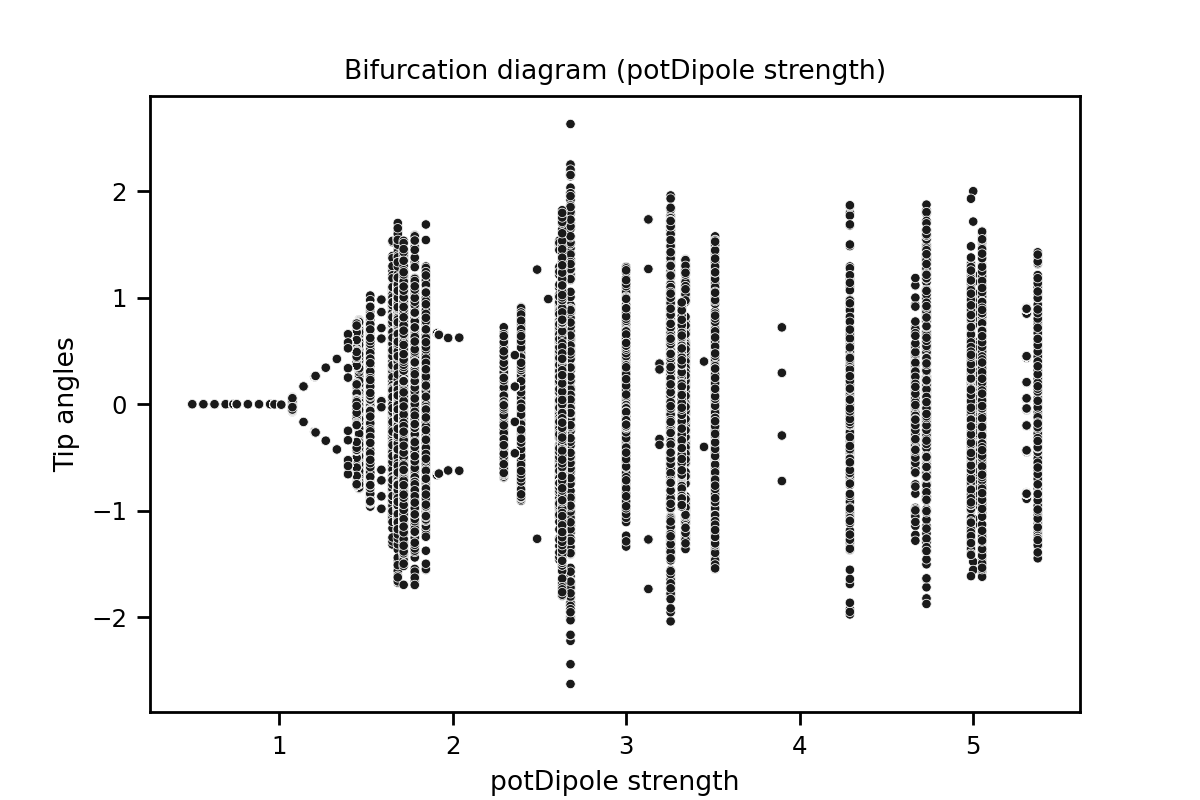

In [32]:

# Create a plot of Angular locations (at constant phase) vs parameter of interest (for Publication)
plt.style.use('default')

sns.set_context("paper")
title = 'Bifurcation diagram ({})'.format(parameter)
plt.figure(figsize=(6,4))
sns.scatterplot(x = parameter, y = 'Tip angles', size = 15, data = df, estimator = None, legend= False, color = 'k')
plt.title(title)
plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
plt.show()